<a href="https://colab.research.google.com/github/Ramisrkit/forest-fires/blob/main/forest_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd

In [43]:
df=pd.read_csv('/content/Algerian_forest_fires_dataset_UPDATE.csv',names=['day','month','year','Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','Class'],header=None)

In [44]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [45]:
df.drop([0,1],axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)

In [46]:
df.columns.str.strip()

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Class'],
      dtype='object')

In [47]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Class
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...
241,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [48]:
df.isnull().sum()/len(df)*100

,0
Temperature,0.406504
RH,0.406504
Ws,0.406504
Rain,0.406504
FFMC,0.406504
DMC,0.406504
DC,0.406504
ISI,0.406504
BUI,0.406504
FWI,0.406504


In [49]:
number=df.columns.drop('Class')

In [50]:
for i in number:
  df[i]=pd.to_numeric(df[i],errors='coerce')

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

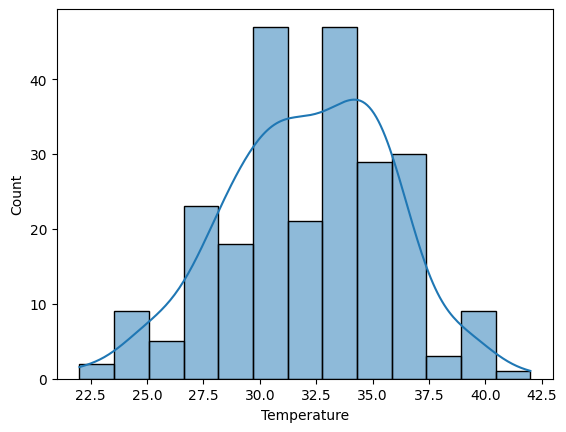

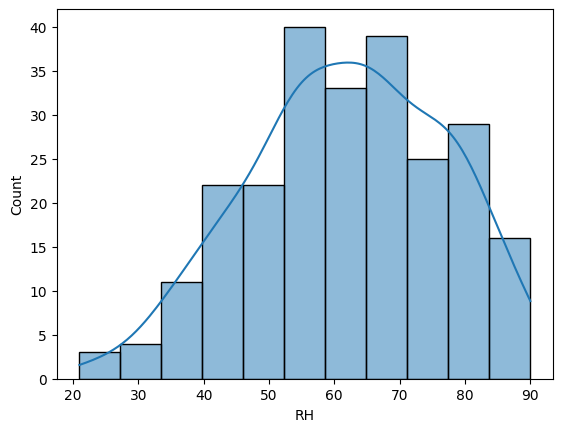

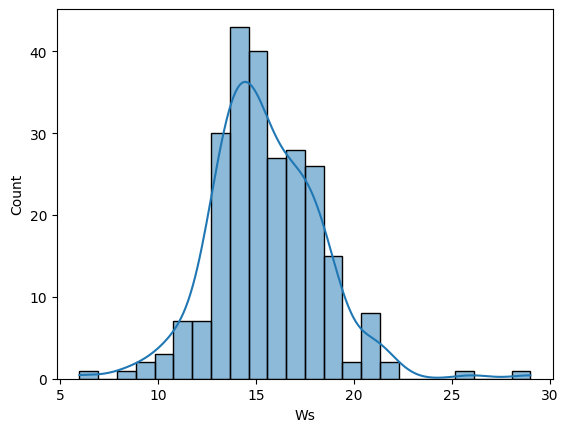

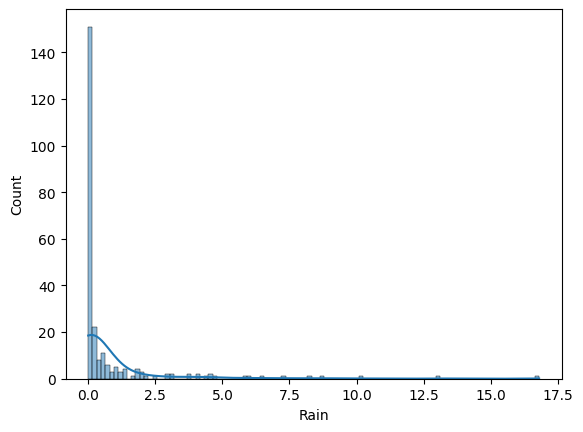

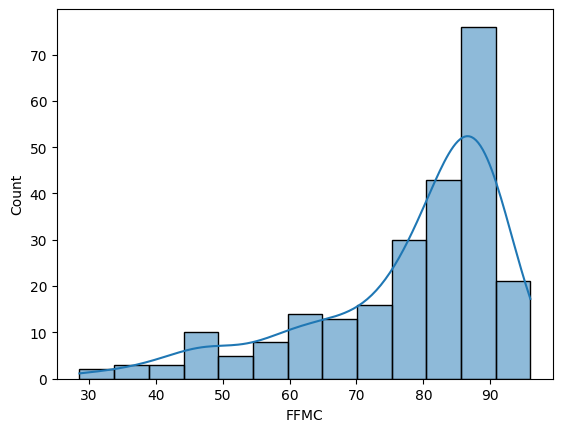

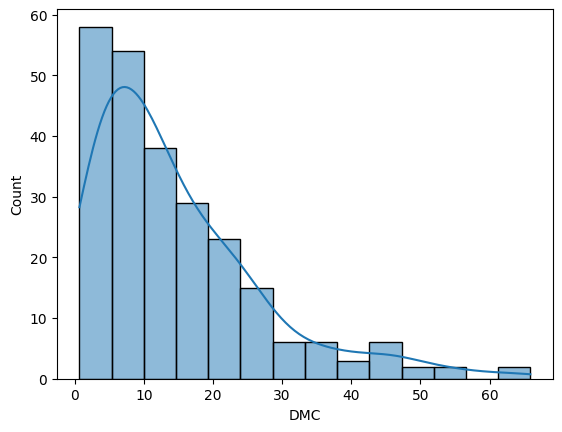

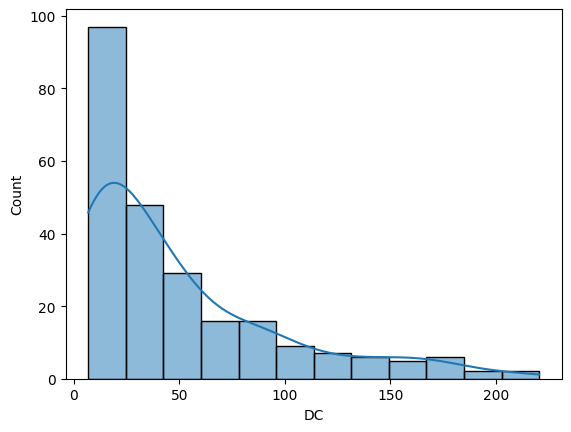

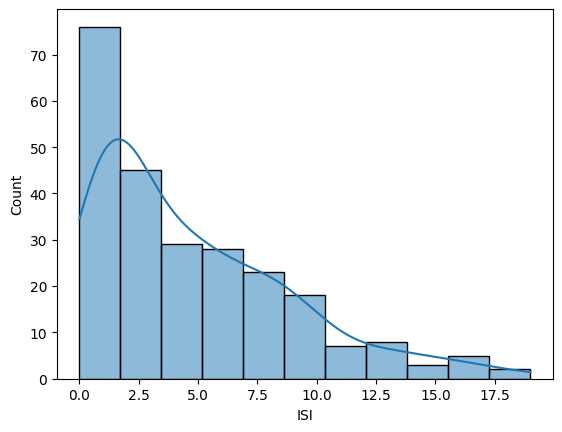

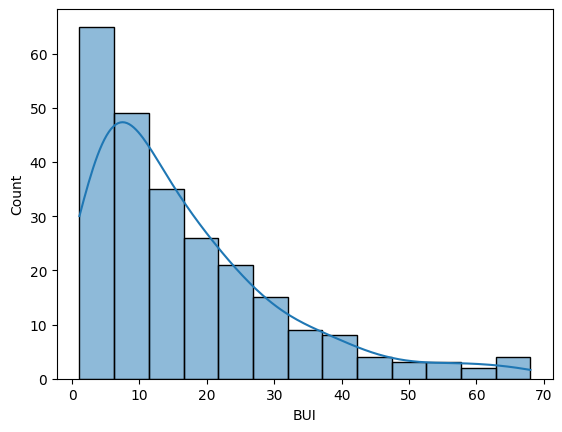

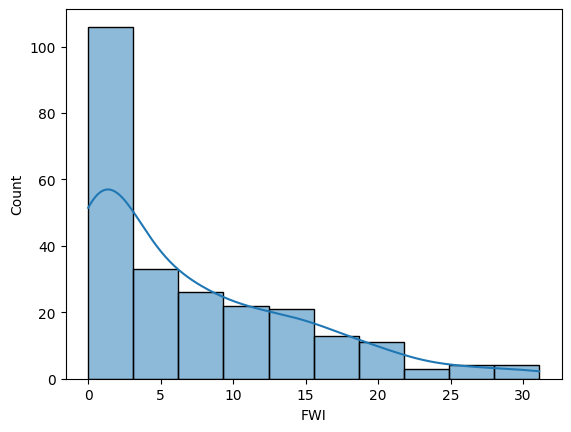

In [13]:
for i in number:
  sns.histplot(df[i],kde=True)
  plt.show()

In [14]:
df['Class']=df['Class'].str.strip()

In [15]:
df['Class']

,Class
0,not fire
1,not fire
2,not fire
3,not fire
4,not fire
...,...
241,fire
242,not fire
243,not fire
244,not fire


<Axes: xlabel='Class', ylabel='count'>

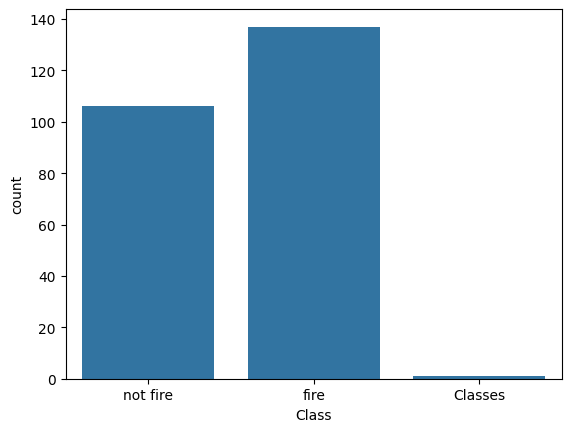

In [16]:
sns.countplot(x=df['Class'])

In [17]:
for i in number:
  if df[i].skew()>=-0.5 and df[i].skew()<=0.5:
    df[i]=df[i].fillna(df[i].mean)
  else:
     df[i]=df[i].fillna(df[i].median)

In [18]:
df.isnull().sum()

,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0
ISI,0
BUI,0
FWI,0


In [19]:
df.dtypes

,0
Temperature,object
RH,object
Ws,object
Rain,object
FFMC,object
DMC,object
DC,object
ISI,object
BUI,object
FWI,object


In [20]:
df.dropna(subset=['Class'], inplace=True)

In [21]:
for i in number:
  df[i]=pd.to_numeric(df[i],errors='coerce')

In [22]:
df.dtypes

,0
Temperature,float64
RH,float64
Ws,float64
Rain,float64
FFMC,float64
DMC,float64
DC,float64
ISI,float64
BUI,float64
FWI,float64


In [23]:
df.isnull().sum()

,0
Temperature,1
RH,1
Ws,1
Rain,1
FFMC,1
DMC,1
DC,1
ISI,1
BUI,1
FWI,1


In [24]:
df.dropna(inplace=True)

In [25]:
df.duplicated().value_counts()

,count
False,243


In [26]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Class
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...
241,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
242,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
243,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


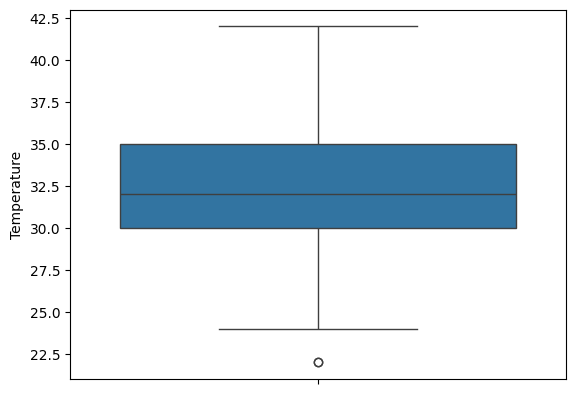

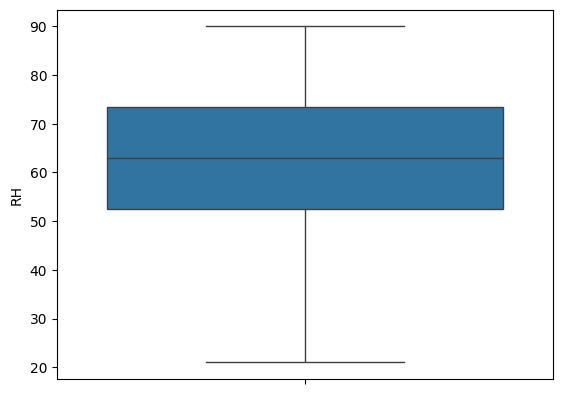

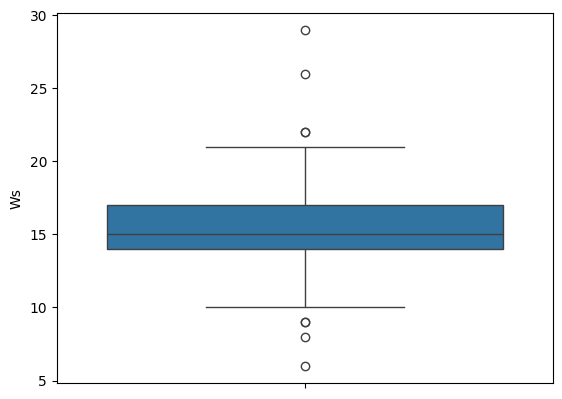

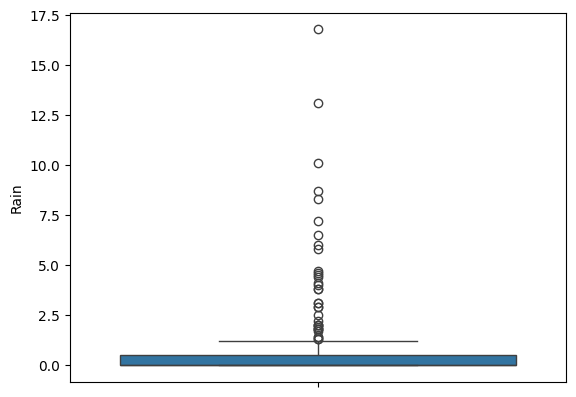

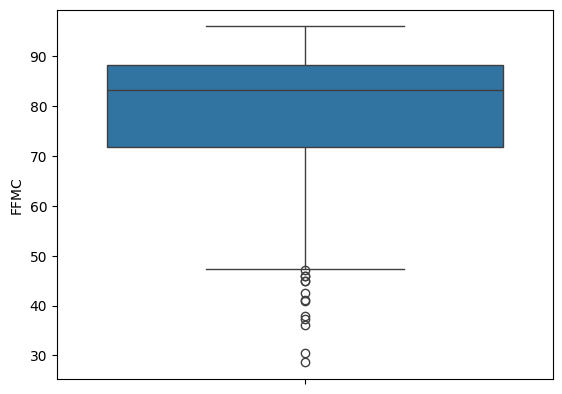

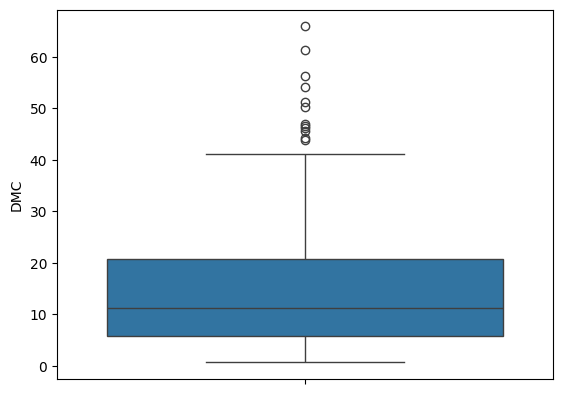

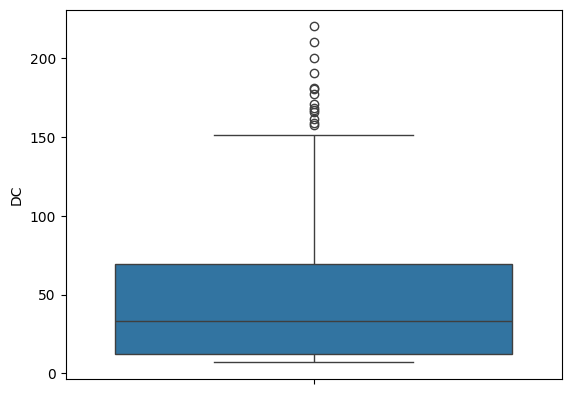

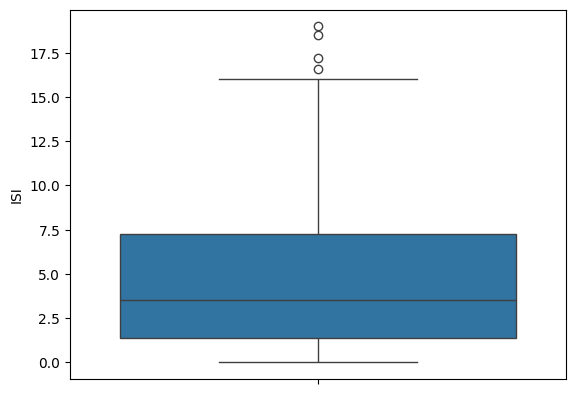

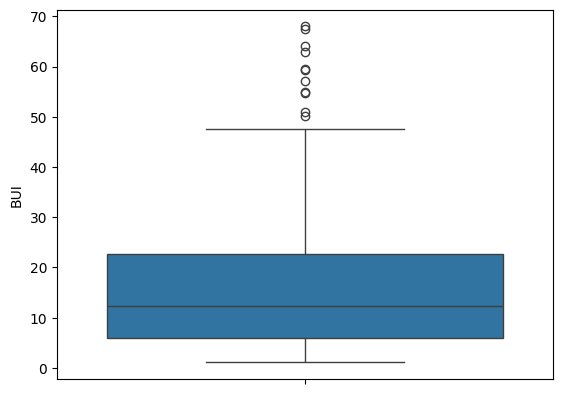

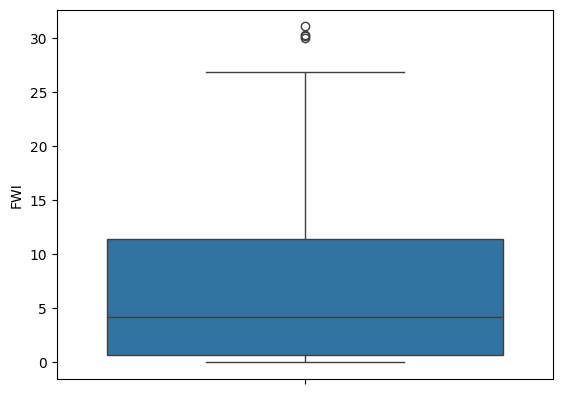

In [27]:
for i in number:
  sns.boxplot(df[i])
  plt.show()

In [28]:
import numpy as np

In [29]:
for i in number:
  q1=df[i].quantile(0.25)
  q3=df[i].quantile(0.75)
  iqr=q3-q1
  high=q3+1.5*iqr
  low=q1-1.5*iqr
  df[i]=np.where(df[i]<low,low,np.where(df[i]>high,high,df[i]))

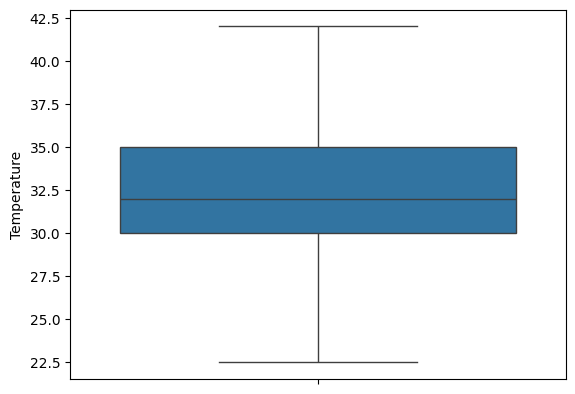

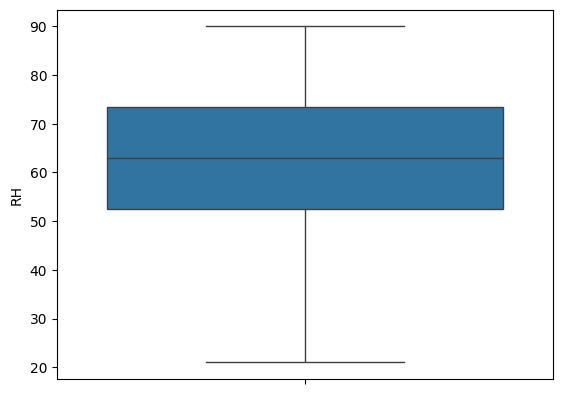

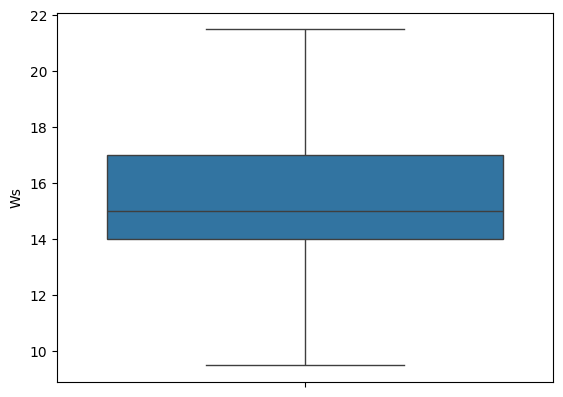

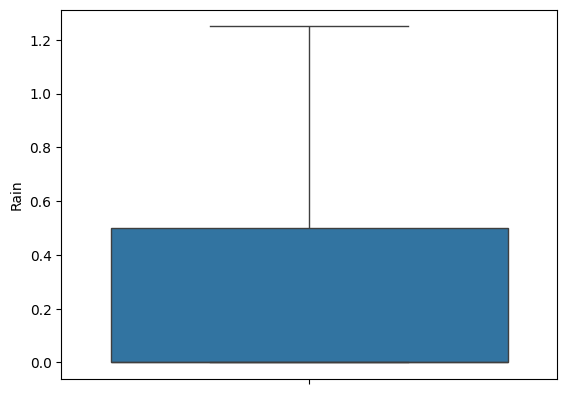

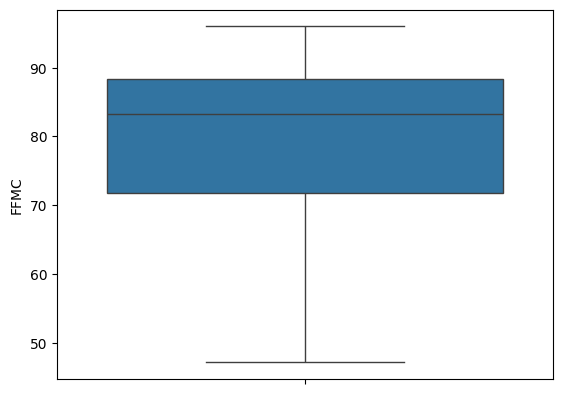

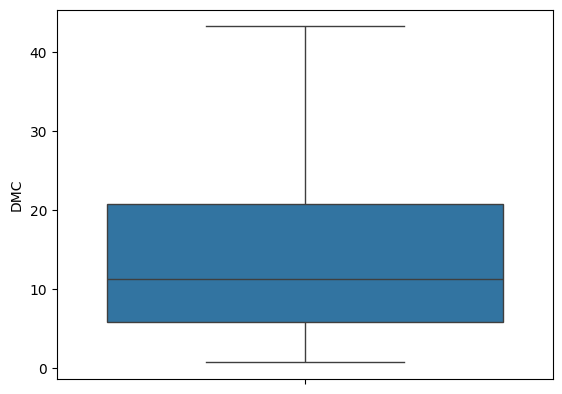

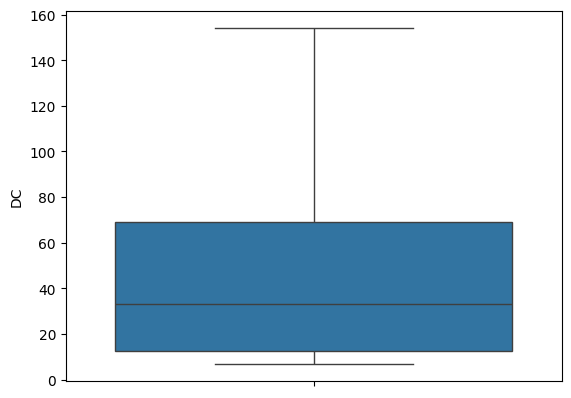

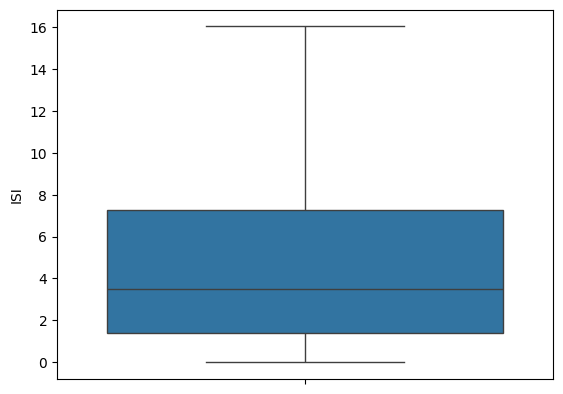

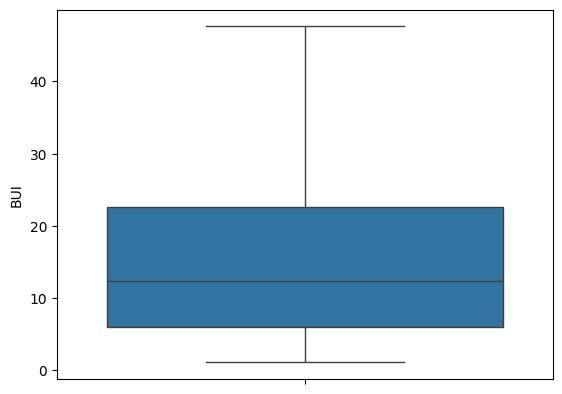

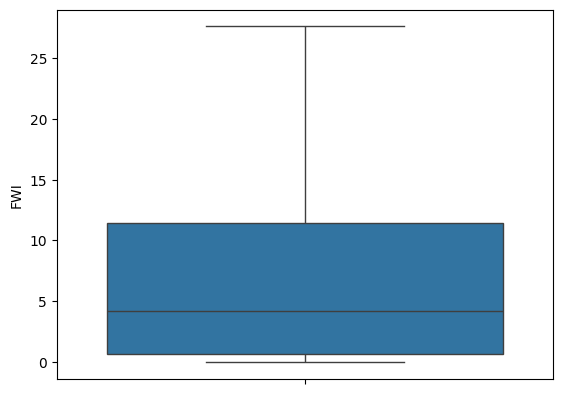

In [30]:
for i in number:
  sns.boxplot(df[i])
  plt.show()

In [31]:
df.duplicated().value_counts()

,count
False,243


In [32]:
df.isnull().sum()

,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0
ISI,0
BUI,0
FWI,0


In [33]:
df.dropna(inplace=True)

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [35]:
Transformer=ColumnTransformer([('num1',MinMaxScaler(),number)])

In [36]:
pipeline=Pipeline([('trans',Transformer),('model',LogisticRegression())])

In [37]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(['Class'],axis=1),df['Class'],test_size=0.2,random_state=42)

In [38]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('num1', MinMaxScaler(),
                                                  Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI'],
      dtype='object'))])),
                ('model', LogisticRegression())])

In [39]:
pipeline.predict(x_test)

array(['fire', 'fire', 'not fire', 'fire', 'fire', 'not fire', 'not fire',
       'fire', 'not fire', 'not fire', 'not fire', 'fire', 'fire', 'fire',
       'fire', 'not fire', 'not fire', 'not fire', 'fire', 'fire',
       'not fire', 'not fire', 'fire', 'not fire', 'fire', 'fire', 'fire',
       'fire', 'not fire', 'fire', 'fire', 'not fire', 'fire', 'fire',
       'not fire', 'not fire', 'not fire', 'fire', 'not fire', 'not fire',
       'fire', 'not fire', 'fire', 'not fire', 'fire', 'fire', 'fire',
       'not fire', 'fire'], dtype=object)

In [40]:
pipeline.score(x_train,y_train)

0.9484536082474226

In [41]:
pipeline.score(x_test,y_test)

0.9183673469387755